#### for now
#### candidate_num=5 has trained 4% training set
#### candidate_num=20 has trained 13.5% training set
#### candidate_num=100 has trained 75% training set

# Most recent results for baseline_wiki2021 
### candidate_num=5, exclude_cases_label_not_in_candidates

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fine_grained_evaluation = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/60000/fg_eval.pkl")

fine_grained_evaluation.head()

,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
0,"[1.1701385974884033, -1.2005358934402466, -1.9...","[7.450177192687988, 4.26120662689209, 4.250411...",0,0.205940,0.132121,was,"high school, back when I","[ was, first, had, went, started]",0.236378
1,"[-1.290698528289795, -1.67819082736969, -2.296...","[4.284456253051758, 3.8585948944091797, 3.2848...",0,0.949189,0.968007,were,", the school's band students","[ were, are, have, ,, began]",0.645627
2,"[2.033902883529663, -2.537160873413086, -3.636...","[8.919028282165527, 4.514125823974609, 4.16683...",0,0.019950,0.032966,to,"overall in the heats, failing","[ to, in, out, the, on]",0.081078
3,"[-0.07594971358776093, -0.32554686069488525, -...","[4.6247711181640625, 4.544124603271484, 4.3300...",0,0.920249,1.165184,for,which serve as subtexts,"[ for, of, to, and, .]",0.641541
4,"[0.9583010077476501, -0.24942409992218018, -1....","[5.490913391113281, 4.244241237640381, 3.84852...",1,1.660598,1.758028,a,mys. The documentary was also awarded,"[ the, a, Best, to, an]",0.513110


In [121]:
fine_grained_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174153 entries, 0 to 174152
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   rerank_logits                 174153 non-null  object 
 1   normal_logits                 174153 non-null  object 
 2   ground_true_difficulty_level  174153 non-null  int64  
 3   rerank_loss                   174153 non-null  float64
 4   normal_loss                   174153 non-null  float64
 5   ground_true                   174153 non-null  object 
 6   inputs_text                   174153 non-null  object 
 7   candidate_tokens              174153 non-null  object 
 8   entropy_difficulty_level      174153 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 12.0+ MB


# visulization
### please help me add some other visulization if you want

<AxesSubplot:ylabel='Frequency'>

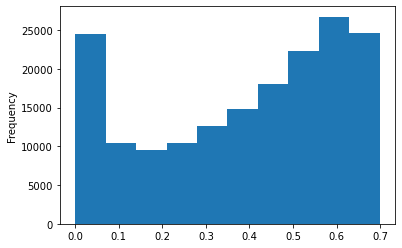

In [122]:
fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

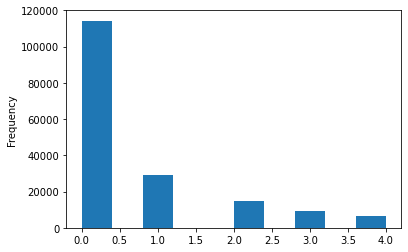

In [123]:
fine_grained_evaluation['ground_true_difficulty_level'].plot(kind='hist')

Text(0, 0.5, 'rerank_loss')

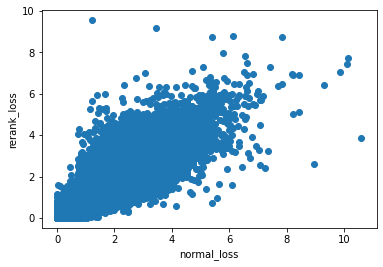

In [124]:
plt.scatter(fine_grained_evaluation['normal_loss'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("normal_loss")
plt.ylabel("rerank_loss")

Text(0, 0.5, 'entropy_difficulty_level')

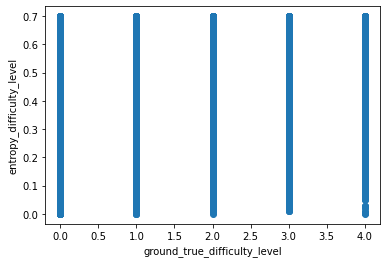

In [125]:
plt.scatter(fine_grained_evaluation['ground_true_difficulty_level'], fine_grained_evaluation['entropy_difficulty_level'])
plt.xlabel("ground_true_difficulty_level")
plt.ylabel("entropy_difficulty_level")


### entropy_difficulty_level VS normal_loss
### entropy_difficulty_level VS rerank_loss

Text(0, 0.5, 'normal_loss')

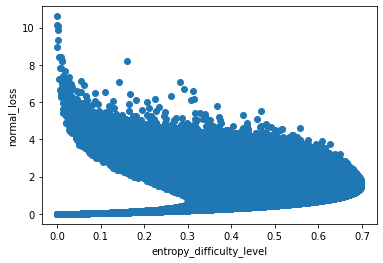

In [126]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 200000
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

Text(0, 0.5, 'normal_loss')

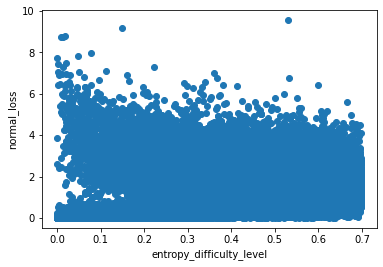

In [127]:
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

### so some important points for last two figures:

#### 1. if the entropy_difficulty_level is vely low (close to 0), which means gpt2 is very confident in these cases, actually it will make some stupid mistakes (some high normal loss). For these stupid mistakes, obviously reranker did better.

#### 2. if the entropy_difficulty_level is vely low, which means gpt2 is very confident in this cases, it did well at most of time (most of them are super-low normal loss). For these cases, seems reranker was not so great. We can see it exlargered some loss for these cases.

#### 3. The cases in 2 are much more than the cases in 1 (I showed it below). So I think original gpt2 did better during low entropy_difficulty_level.

#### 4. if the entropy_difficulty_level is vely high (close to 0.7), which means gpt2 feels ambigious for these cases, its normal_loss are usually around 1.5-2.5, while its rerank_loss are usually 0-4. So it exlargered some cases' loss, at the same time it decrease some other cases' loss. However, the second kind of cases are more than the first kind of cases. So I think reranker did better during large entropy_difficulty_level.

### very easy cases and very hard cases (maybe we name them gpt2 low/high confidence cases?)

In [128]:
very_easy_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] < 0.02]
very_hard_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] > 0.68]

In [135]:
print(very_easy_cases.shape)
very_easy_cases.head()

(13548, 9)


,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
11,"[5.556052207946777, -0.25776252150535583, -2.7...","[19.245695114135742, 11.41446590423584, 10.040...",0,0.003359,0.000607,ody,mys. The documentary was also awarded a 2010 Peab,"[ody, ot, oard, ush, ees]",0.002481
29,"[5.73137092590332, -4.951800346374512, -1.1159...","[12.426370620727539, 4.200319290161133, 4.1505...",0,0.001153,0.000989,.,", the school's band students were selected to ...","[., ."", lyss, .], well]",0.003993
48,"[4.998497009277344, -3.1333823204040527, -4.36...","[11.115789413452148, 3.4557881355285645, 3.224...",0,0.000501,0.001499,.,". During the eclipse of the primary component,...","[., ,, and, %, %.]",0.005776
49,"[4.822507858276367, -0.6364384889602661, -3.76...","[11.827831268310547, 5.76945161819458, 4.07277...",0,0.004707,0.003401,of,"overall in the heats, failing to qualify for ...","[ of, for, ,, and, .]",0.011276
53,"[2.378268003463745, -1.7725067138671875, -3.53...","[13.64449691772461, 5.709970474243164, 5.70239...",0,0.023392,0.001306,Columbia,mys. The documentary was also awarded a 2010 P...,"[ Columbia, Idaho, Mount, snow, Gu]",0.005113


In [136]:
print(very_hard_cases.shape)
very_hard_cases.head()

(5066, 9)


,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
93,"[-2.7480058670043945, -2.243276596069336, -3.3...","[4.3740410804748535, 4.360174179077148, 4.3128...",4,1.924002,1.866485,first,blacksmith's workshop.His company expanded in...,"[ electricity, own, gas, power, first]",0.694572
94,"[-0.32410740852355957, -1.177468180656433, -5....","[6.228437423706055, 6.022573471069336, 6.02168...",0,0.376019,1.371536,BC,with temperature of kBCAr:kBCAr = (4 ± 2) cm3...,"[BC, rypt, BD, B, BC]",0.689334
168,"[-0.310024231672287, -0.44003570079803467, -0....","[4.695051193237305, 4.5282511711120605, 4.1902...",3,1.507931,1.797313,also,"overall in the heats, failing to qualify for ...","[ been, won, competed, also, a]",0.687517
181,"[-0.7806717157363892, -0.7229077816009521, -2....","[5.339119911193848, 4.950315475463867, 4.93324...",0,1.015967,1.205858,viol,which serve as subtexts for those familiar wi...,"[ viol, fl, violin, ),, bass]",0.683420
199,"[-0.8639379739761353, -0.948291540145874, -1.0...","[4.017404556274414, 3.6313347816467285, 3.5219...",3,2.148157,1.843198,approach,riceps strengthening exercises along with rang...,"[ surgery, treatment, surgical, approach, ...",0.680133


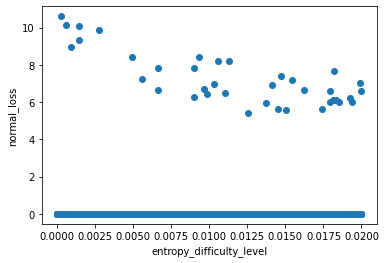

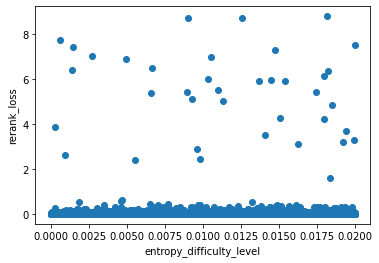

In [131]:
plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()


plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

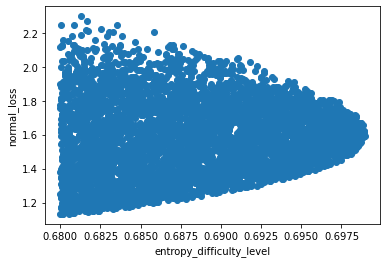

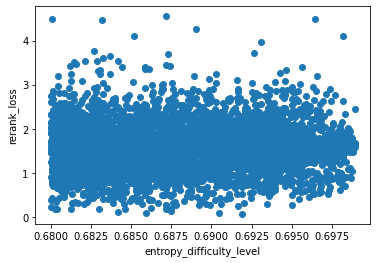

In [132]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 200000
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

plt.show()

plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

plt.show()

## Decile
#### find the decile (https://en.wikipedia.org/wiki/Decile) on the entropy difficulty and average the loss within each of 10 bins and compare the 10 average losses of the 1st stage prediction and 2nd stage prediction

In [161]:
import pandas as pd 
import numpy as np 

fine_grained_evaluation["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()

For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.03654110978533352
avg rerank_loss: 0.04217339204215009

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 0.2095394732421486
avg rerank_loss: 0.21814372434632082

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 0.48832271644225794
avg rerank_loss: 0.4927083792376779

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 0.7296292050060034
avg rerank_loss: 0.7351073080959788

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 0.9244330690460957
avg rerank_loss: 0.9217726811087089

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 1.0843616205455584
avg rerank_loss: 1.080117358723209

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 1.2260648240158005
avg rerank_loss: 1.2254494387189854

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 1.3333087090100155
avg rerank_loss: 1.3238738744944936

For Decile_for_entropy_difficulty_level of  8

## Mean reciprocal rank

In [209]:
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=5):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation['noraml_prediction_gt_rank'] = fine_grained_evaluation[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation['rerank_prediction_gt_rank'] = fine_grained_evaluation[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
print()

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print()

For all evaluation data:
normal MRR is  0.7893616532589159
rerank MRR is  0.7923585391389564

For Decile_for_entropy_difficulty_level of  0
normal MRR is  0.9969309830041341
rerank MRR is  0.9968793063849335

For Decile_for_entropy_difficulty_level of  1
normal MRR is  0.9757622739018089
rerank MRR is  0.9761661403005073

For Decile_for_entropy_difficulty_level of  2
normal MRR is  0.928294573643411
rerank MRR is  0.9288975021533162

For Decile_for_entropy_difficulty_level of  3
normal MRR is  0.867143267298306
rerank MRR is  0.867998851564743

For Decile_for_entropy_difficulty_level of  4
normal MRR is  0.8131191624559791
rerank MRR is  0.8141948017148981

For Decile_for_entropy_difficulty_level of  5
normal MRR is  0.7617848597951956
rerank MRR is  0.7641850894822472

For Decile_for_entropy_difficulty_level of  6
normal MRR is  0.7089491817398794
rerank MRR is  0.7108833381184803

For Decile_for_entropy_difficulty_level of  7
normal MRR is  0.6681883433821418
rerank MRR is  0.6716709

### candidate_num=20, exclude_cases_label_not_in_candidates

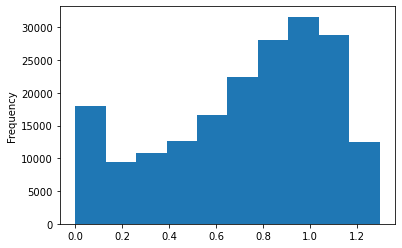

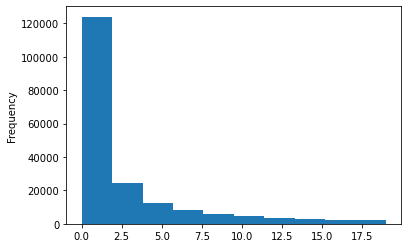

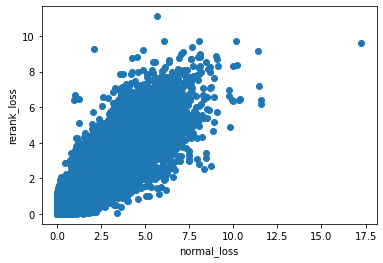

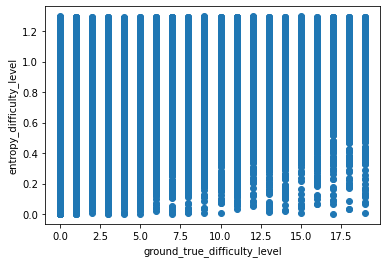

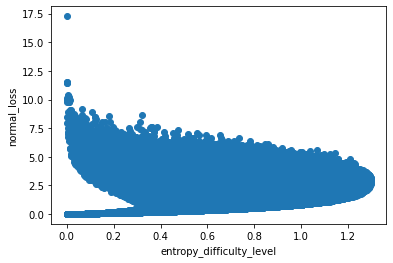

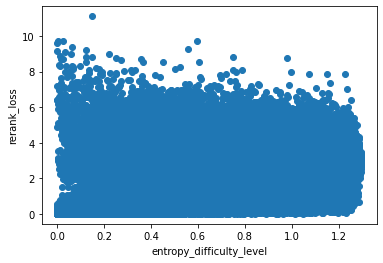

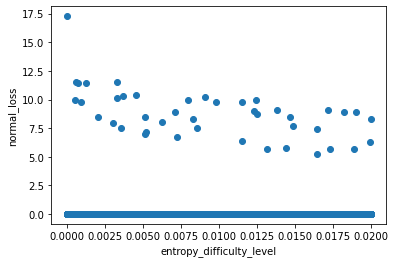

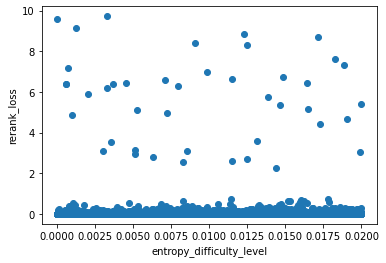

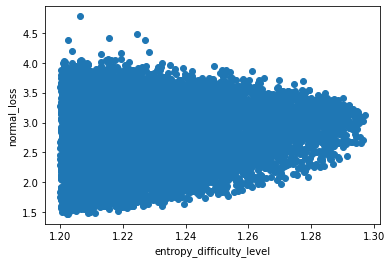

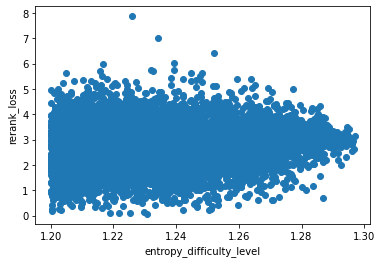

For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.19393947223425628
avg rerank_loss: 0.19574818622575166

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 0.738730306301968
avg rerank_loss: 0.738911934617314

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 1.1837803458923406
avg rerank_loss: 1.187565724317984

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 1.5007212931647154
avg rerank_loss: 1.4952437334605015

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 1.7351968922280838
avg rerank_loss: 1.7321853333871378

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 1.9514189538714986
avg rerank_loss: 1.9386980749837184

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 2.1488401125805376
avg rerank_loss: 2.127130238383696

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 2.297913435838569
avg rerank_loss: 2.2787177330176562

For Decile_for_entropy_difficulty_level of  8
avg n

In [252]:
fine_grained_evaluation = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates_canNUM20/85000/fg_eval.pkl")

fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')
plt.show()
fine_grained_evaluation['ground_true_difficulty_level'].plot(kind='hist')
plt.show()
plt.scatter(fine_grained_evaluation['normal_loss'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("normal_loss")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(fine_grained_evaluation['ground_true_difficulty_level'], fine_grained_evaluation['entropy_difficulty_level'])
plt.xlabel("ground_true_difficulty_level")
plt.ylabel("entropy_difficulty_level")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

very_easy_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] < 0.02]
very_hard_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] > 1.2]

plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

import pandas as pd 
import numpy as np 

fine_grained_evaluation["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()
    
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=20):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation['noraml_prediction_gt_rank'] = fine_grained_evaluation[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation['rerank_prediction_gt_rank'] = fine_grained_evaluation[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['noraml_prediction_gt_rank'].tolist(), CAN_NUM=20))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['rerank_prediction_gt_rank'].tolist(), CAN_NUM=20))
print()

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=20))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=20))
    print()

### candidate_num=100, exclude_cases_label_not_in_candidates

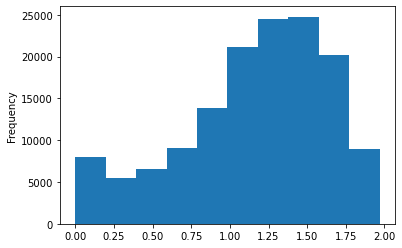

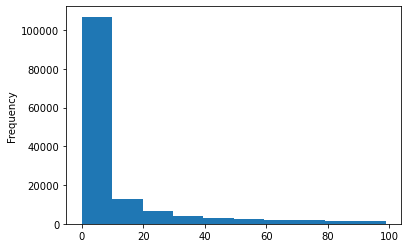

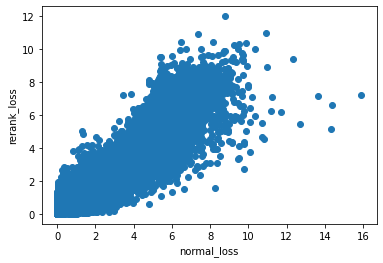

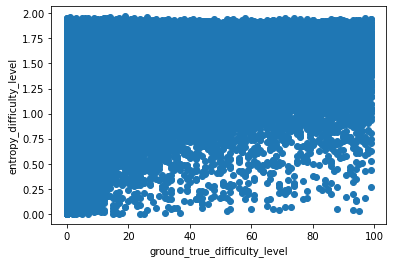

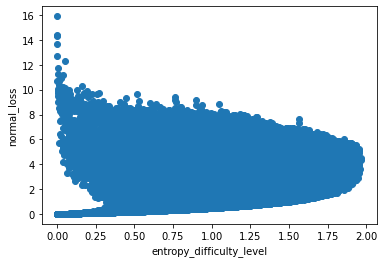

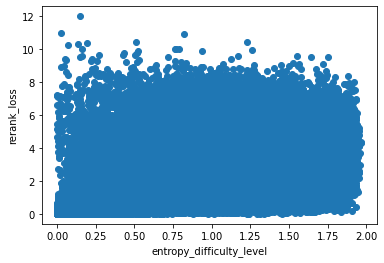

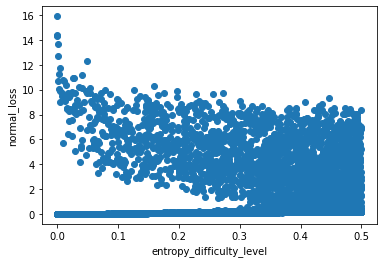

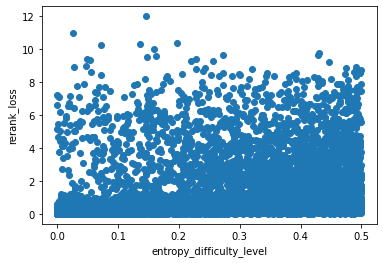

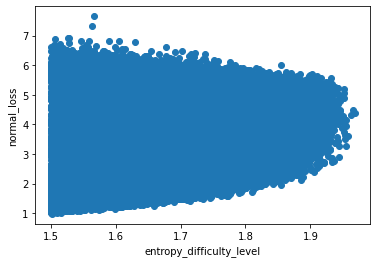

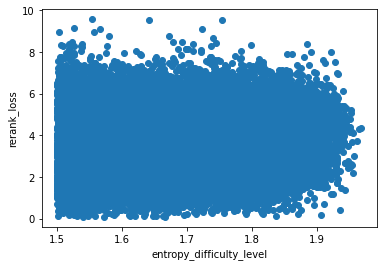

For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.5737351289760331
avg rerank_loss: 0.6107281336590225

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 1.4998222881250107
avg rerank_loss: 1.5235198705992605

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 2.0467578034833593
avg rerank_loss: 2.060641818665486

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 2.4005858496070007
avg rerank_loss: 2.394824340076198

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 2.6797973425692114
avg rerank_loss: 2.6583872471793195

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 2.9290264930629695
avg rerank_loss: 2.907675152736307

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 3.1522478103528897
avg rerank_loss: 3.112123477371157

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 3.4140068655601508
avg rerank_loss: 3.3603446832636066

For Decile_for_entropy_difficulty_level of  8
avg no

In [256]:
fine_grained_evaluation = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates_canNUM100/50000/fg_eval.pkl")

fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')
plt.show()
fine_grained_evaluation['ground_true_difficulty_level'].plot(kind='hist')
plt.show()
plt.scatter(fine_grained_evaluation['normal_loss'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("normal_loss")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(fine_grained_evaluation['ground_true_difficulty_level'], fine_grained_evaluation['entropy_difficulty_level'])
plt.xlabel("ground_true_difficulty_level")
plt.ylabel("entropy_difficulty_level")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

very_easy_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] < 0.5]
very_hard_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] > 1.5]

plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

import pandas as pd 
import numpy as np 

fine_grained_evaluation["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()
    
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=100):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation['noraml_prediction_gt_rank'] = fine_grained_evaluation[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation['rerank_prediction_gt_rank'] = fine_grained_evaluation[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
print()

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print()

# Compare different training step's results for baseline_wiki2021 
#### only for candidate num = 5, in 10000, 30000, 50000 and 60000 step

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fine_grained_evaluation_10000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/10000/fg_eval.pkl")
fine_grained_evaluation_30000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/30000/fg_eval.pkl")
fine_grained_evaluation_50000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/50000/fg_eval.pkl")
fine_grained_evaluation_60000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/60000/fg_eval.pkl")

#### you can see the details by double click figures below

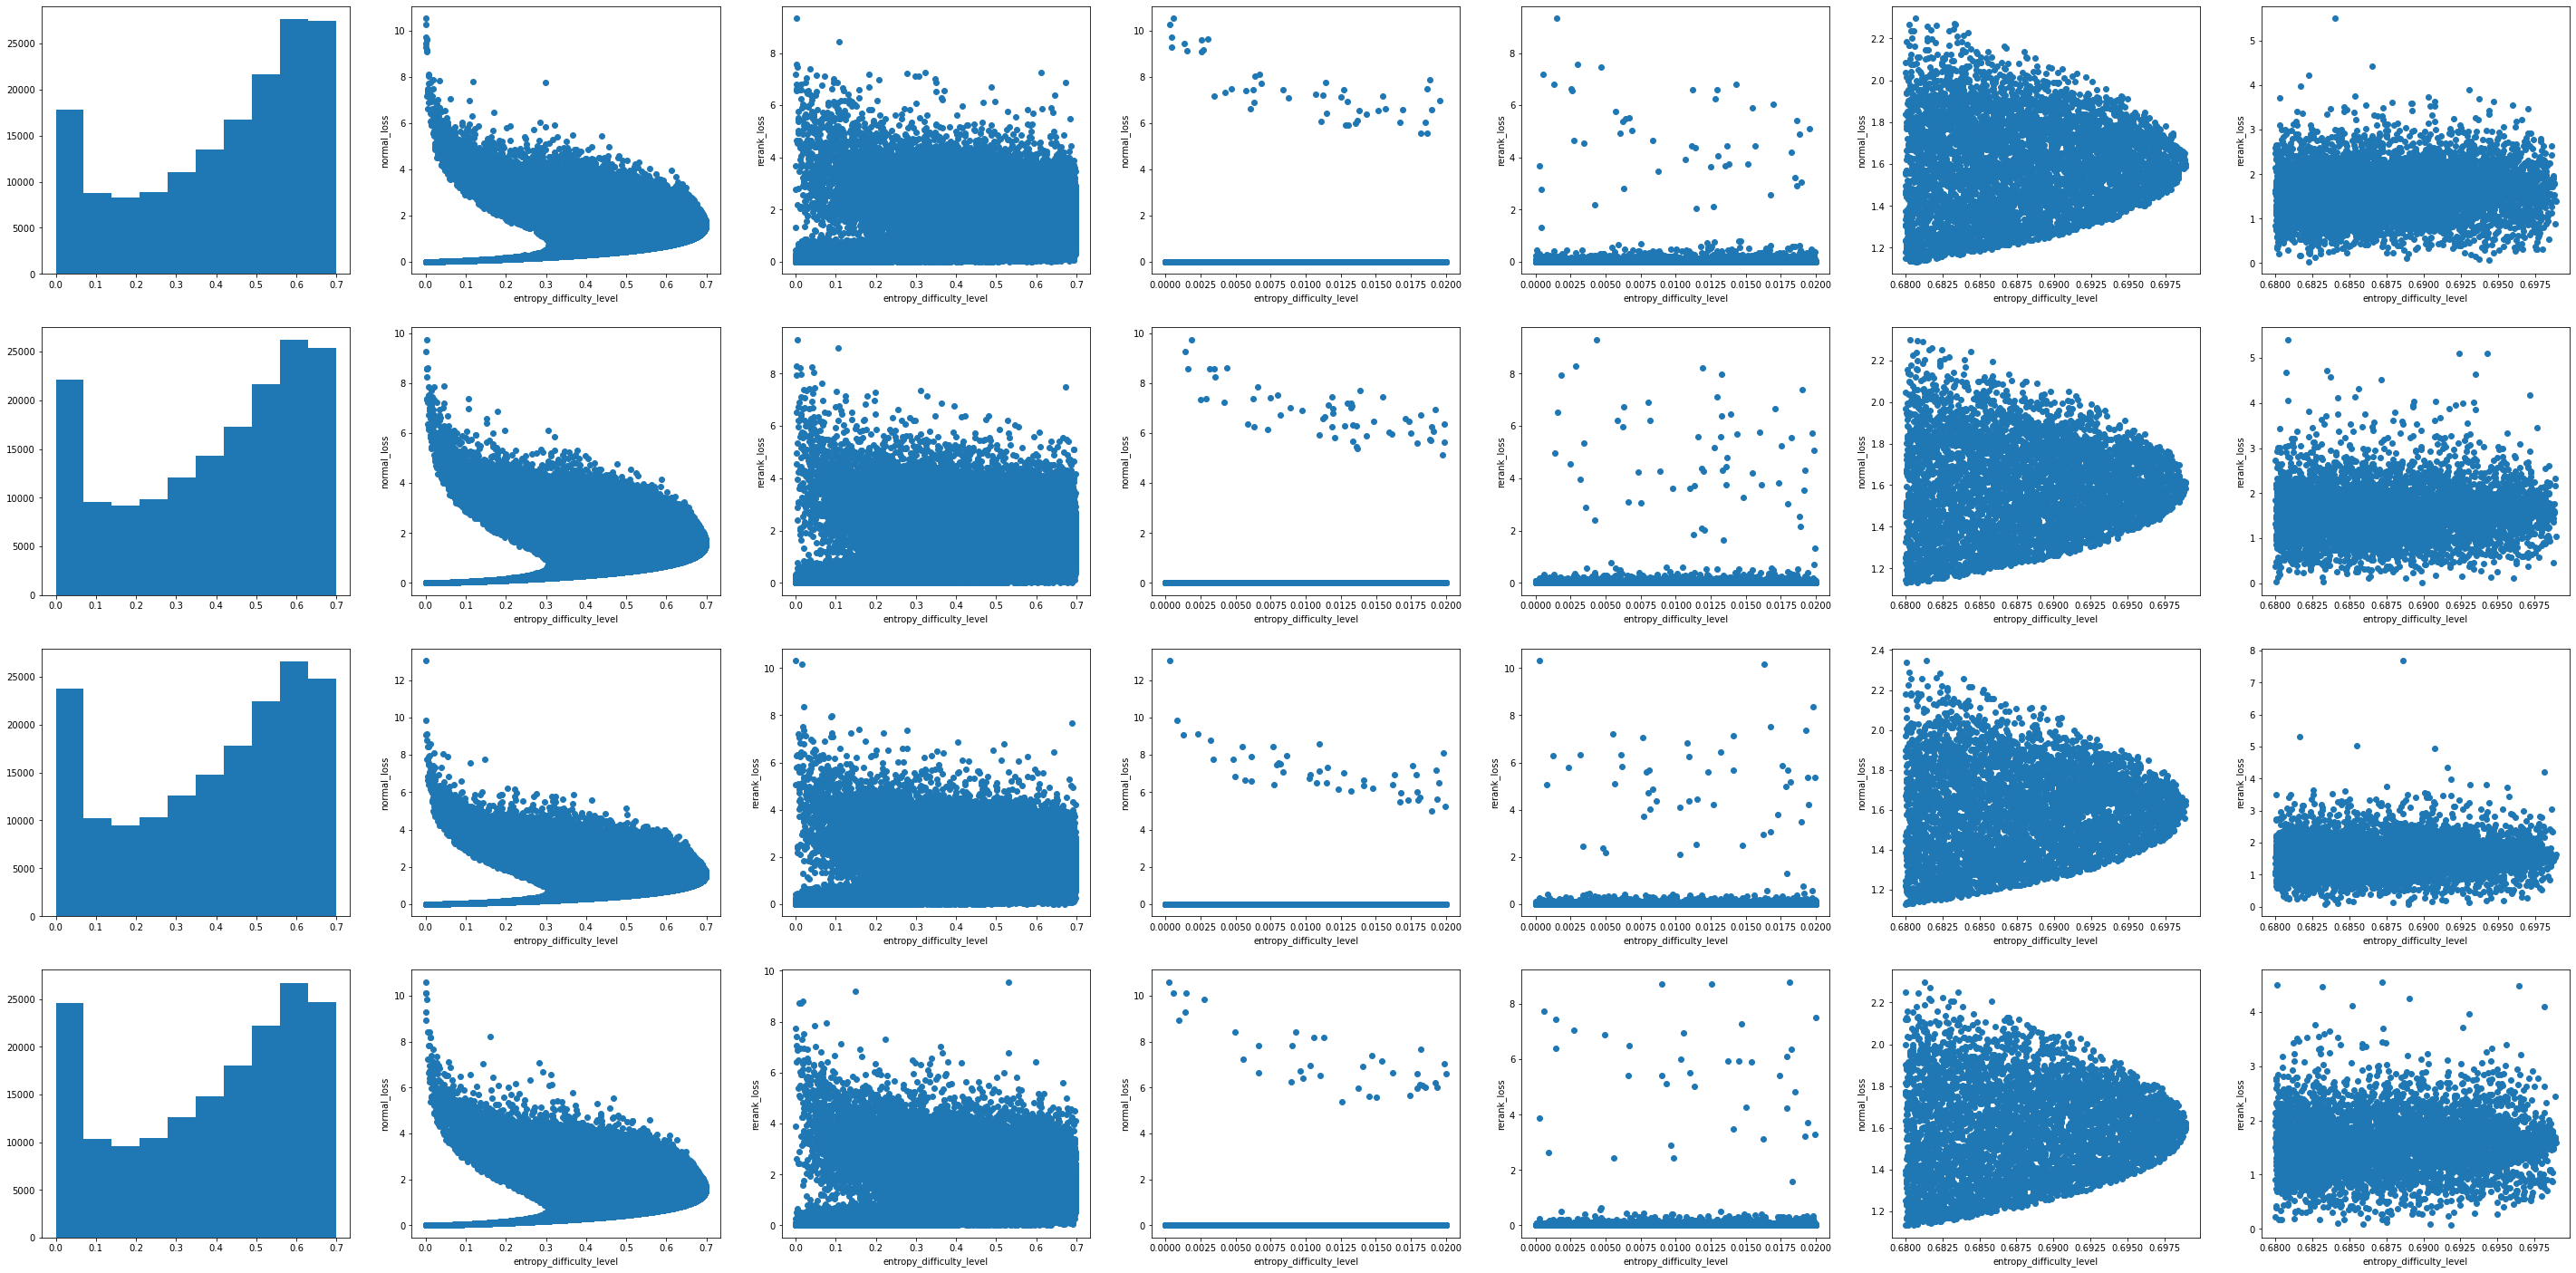

In [241]:
fig, ax = plt.subplots(nrows=4, ncols=7,figsize=(50,25))

count = 0
for tmp_df in [fine_grained_evaluation_10000, fine_grained_evaluation_30000, fine_grained_evaluation_50000, fine_grained_evaluation_60000]: 
    ax[count][0].hist(tmp_df['entropy_difficulty_level'])
    ax[count][1].scatter(tmp_df['entropy_difficulty_level'], tmp_df['normal_loss'])
    ax[count][1].set_xlabel("entropy_difficulty_level")
    ax[count][1].set_ylabel("normal_loss")
    ax[count][2].scatter(tmp_df['entropy_difficulty_level'], tmp_df['rerank_loss'])
    ax[count][2].set_xlabel("entropy_difficulty_level")
    ax[count][2].set_ylabel("rerank_loss")
    
    very_easy_cases = tmp_df[tmp_df["entropy_difficulty_level"] < 0.02]    
    ax[count][3].scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
    ax[count][3].set_xlabel("entropy_difficulty_level")
    ax[count][3].set_ylabel("normal_loss")
    ax[count][4].scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
    ax[count][4].set_xlabel("entropy_difficulty_level")
    ax[count][4].set_ylabel("rerank_loss")

    very_hard_cases = tmp_df[tmp_df["entropy_difficulty_level"] > 0.68]
    ax[count][5].scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
    ax[count][5].set_xlabel("entropy_difficulty_level")
    ax[count][5].set_ylabel("normal_loss")
    ax[count][6].scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
    ax[count][6].set_xlabel("entropy_difficulty_level")
    ax[count][6].set_ylabel("rerank_loss")
    
    count += 1

In [242]:
import pandas as pd 
import numpy as np 

fine_grained_evaluation_10000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_10000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fine_grained_evaluation_30000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_30000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fine_grained_evaluation_50000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_50000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fine_grained_evaluation_60000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_60000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level_10000 = fine_grained_evaluation_10000[fine_grained_evaluation_10000['Decile_for_entropy_difficulty_level'] == i]
    this_level_30000 = fine_grained_evaluation_30000[fine_grained_evaluation_30000['Decile_for_entropy_difficulty_level'] == i]
    this_level_50000 = fine_grained_evaluation_50000[fine_grained_evaluation_50000['Decile_for_entropy_difficulty_level'] == i]
    this_level_60000 = fine_grained_evaluation_60000[fine_grained_evaluation_60000['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss for 10000, 30000, 50000, 60000 is ", 
          this_level_10000['normal_loss'].mean(),
          this_level_30000['normal_loss'].mean(),
          this_level_50000['normal_loss'].mean(),
          this_level_60000['normal_loss'].mean())
    print("avg rerank_loss for 10000, 30000, 50000, 60000 is ", 
          this_level_10000['rerank_loss'].mean(),
          this_level_30000['rerank_loss'].mean(),
          this_level_50000['rerank_loss'].mean(),
          this_level_60000['rerank_loss'].mean())
    print()

For Decile_for_entropy_difficulty_level of  0
avg normal_loss for 10000, 30000, 50000, 60000 is  0.08627132408451704 0.05315141818381903 0.03918272797633588 0.03654110978533352
avg rerank_loss for 10000, 30000, 50000, 60000 is  0.09523991754704442 0.05734437385518324 0.04517340774790445 0.04217339204215009

For Decile_for_entropy_difficulty_level of  1
avg normal_loss for 10000, 30000, 50000, 60000 is  0.3324111822522964 0.25671811797996497 0.23170358263661253 0.2095394732421486
avg rerank_loss for 10000, 30000, 50000, 60000 is  0.3602228481227062 0.26830387156579666 0.23985891607437962 0.21814372434632082

For Decile_for_entropy_difficulty_level of  2
avg normal_loss for 10000, 30000, 50000, 60000 is  0.6057671960005164 0.5373987150858941 0.4964331393952196 0.48832271644225794
avg rerank_loss for 10000, 30000, 50000, 60000 is  0.6339608725456972 0.5461941692065246 0.5019780394656271 0.4927083792376779

For Decile_for_entropy_difficulty_level of  3
avg normal_loss for 10000, 30000, 500

In [243]:
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=5):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation_10000['noraml_prediction_gt_rank'] = fine_grained_evaluation_10000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_10000['rerank_prediction_gt_rank'] = fine_grained_evaluation_10000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_30000['noraml_prediction_gt_rank'] = fine_grained_evaluation_30000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_30000['rerank_prediction_gt_rank'] = fine_grained_evaluation_30000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_50000['noraml_prediction_gt_rank'] = fine_grained_evaluation_50000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_50000['rerank_prediction_gt_rank'] = fine_grained_evaluation_50000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_60000['noraml_prediction_gt_rank'] = fine_grained_evaluation_60000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_60000['rerank_prediction_gt_rank'] = fine_grained_evaluation_60000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)


print("normal MRR for 10000, 30000, 50000, 60000 is ", 
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_10000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_30000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_50000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_60000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
print("rerank MRR for 10000, 30000, 50000, 60000 is ", 
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_10000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_30000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_50000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_60000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
print()


For all evaluation data:
normal MRR for 10000, 30000, 50000, 60000 is  0.7733668533002456 0.7832853003009275 0.7877406193668918 0.7893616532589159
rerank MRR for 10000, 30000, 50000, 60000 is  0.7742804730245546 0.7856795928230891 0.7906672302187432 0.7923585391389564



In [244]:
for i in range(10):
    this_level_10000 = fine_grained_evaluation_10000[fine_grained_evaluation_10000['Decile_for_entropy_difficulty_level'] == i]
    this_level_30000 = fine_grained_evaluation_30000[fine_grained_evaluation_30000['Decile_for_entropy_difficulty_level'] == i]
    this_level_50000 = fine_grained_evaluation_50000[fine_grained_evaluation_50000['Decile_for_entropy_difficulty_level'] == i]
    this_level_60000 = fine_grained_evaluation_60000[fine_grained_evaluation_60000['Decile_for_entropy_difficulty_level'] == i]
    
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR for 10000, 30000, 50000, 6000 is ", 
          mean_reciprocal_rank(gt_ranks=this_level_10000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_30000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_50000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_60000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print("rerank MRR for 10000, 30000, 50000, 6000 is ", 
          mean_reciprocal_rank(gt_ranks=this_level_10000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_30000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_50000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_60000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print()

For Decile_for_entropy_difficulty_level of  0
normal MRR for 10000, 30000, 50000, 6000 is  0.991772633744856 0.9952436356404136 0.9966564381658175 0.9969309830041341
rerank MRR for 10000, 30000, 50000, 6000 is  0.9919084362139918 0.9953182179793159 0.9967394241161032 0.9968793063849335

For Decile_for_entropy_difficulty_level of  1
normal MRR for 10000, 30000, 50000, 6000 is  0.9569922011646809 0.9691160968235973 0.9727163067183912 0.9757622739018089
rerank MRR for 10000, 30000, 50000, 6000 is  0.9571732823013767 0.9693507965869086 0.9731341555208153 0.9761661403005073

For Decile_for_entropy_difficulty_level of  2
normal MRR for 10000, 30000, 50000, 6000 is  0.9037924151696607 0.9182906696899178 0.9261169976646788 0.928294573643411
rerank MRR for 10000, 30000, 50000, 6000 is  0.904087700886886 0.9186735485410824 0.9267085480477872 0.9288975021533162

For Decile_for_entropy_difficulty_level of  3
normal MRR for 10000, 30000, 50000, 6000 is  0.8392946066629627 0.85701414165523 0.8648486